<h1 style="border: 2px solid cyan; text-align: center; border-radius: 8px; padding: 8px" > Digital Image </h1>


## Importing necessary libraries


In [313]:
import cv2  # to read images
import matplotlib.pyplot as plt  # to display images
import copy  # to crete a deep copy of images

## 1| Loading `IMG.jpg`


In [314]:
IMG = cv2.imread("./images/IMG.jpg")  # => "IMG.jpg" as a numpy array.
img = cv2.cvtColor(
    IMG, cv2.COLOR_BGR2RGB
)  # This line converts the color space of the image from BGR to RGB.
img = IMG.tolist()  # Converting the NumPy array IMG to a Python list

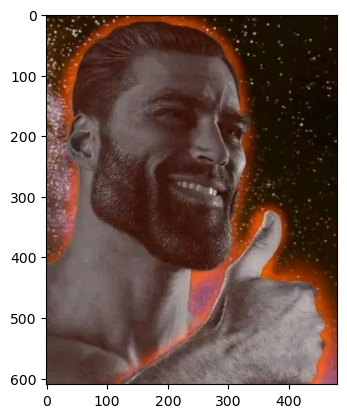

In [315]:
plt.imshow(img)
plt.show()

## 2| Determining the pixel resolution of `IMG`


In [316]:
def getHeight(image):
    return len(image)


def getWidth(image):
    return len(image[0])


def getColorChannels(image):
    return len(image[0][0])


def getPixelResolution(image):
    return (
        str(getHeight(image=img))
        + " X "
        + str(getWidth(image=img))
        + " X "
        + str(getColorChannels(image=img))
    )

In [317]:
getPixelResolution(image=img)

'610 X 480 X 3'

## 3| the RGB values of the pixel `IMG(10, 15)`


In [318]:
def getRGB(image, x, y):
    return image[x][y]

In [319]:
getRGB(image=img, x=10, y=15)

[41, 20, 0]

## 4| Calculating the brightness of `IMG`


![average brightness](<images/average brightness.png>)


In [320]:
def getAverageBrightness(image, colorChannel):
    m = getHeight(image=image)
    n = getWidth(image=image)
    brightness = 0
    for i in range(0, m):
        for j in range(0, n):
            brightness += image[i][j][colorChannel] / (m * n)

    return brightness

In [321]:
print("Red Average Brightness: ", getAverageBrightness(image=img, colorChannel=0))
print("Green Average Brightness: ", getAverageBrightness(image=img, colorChannel=1))
print("Blue Average Brightness: ", getAverageBrightness(image=img, colorChannel=2))

Red Average Brightness:  92.00018101092316
Green Average Brightness:  63.96951502733377
Blue Average Brightness:  54.17469945356442


## 5| Calculating the average contrast of `IMG`


In [322]:
def getAverageContrast(image, colorChannel):
    m = getHeight(image=image)
    n = getWidth(image=image)
    max = image[0][0][0]
    min = image[0][0][0]
    for i in range(0, m):
        for j in range(0, n):
            if max < image[i][j][colorChannel]:
                max = image[i][j][colorChannel]
            if min > image[i][j][colorChannel]:
                min = image[i][j][colorChannel]

    return max - min

In [323]:
print("Red Average Contrast: ", getAverageContrast(image=img, colorChannel=0))
print("Green Average Contrast: ", getAverageContrast(image=img, colorChannel=1))
print("Blue Average Contrast: ", getAverageContrast(image=img, colorChannel=2))

Red Average Contrast:  251
Green Average Contrast:  250
Blue Average Contrast:  247


## 6| Showing the RGB channels of `IMG` separately


In [324]:
def showChannel(image, colorChannel):
    m = getHeight(image=image)
    n = getWidth(image=image)
    o = getColorChannels(image=image)
    tmp = copy.deepcopy(image)
    for i in range(0, m):
        for j in range(0, n):
            for k in range(0, o):
                if k != colorChannel:
                    tmp[i][j][k] = 0
    plt.imshow(tmp)
    plt.show()

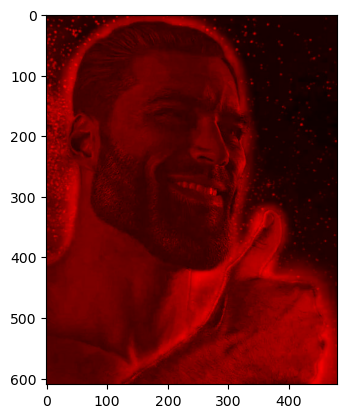

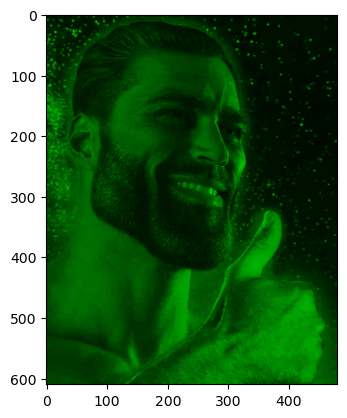

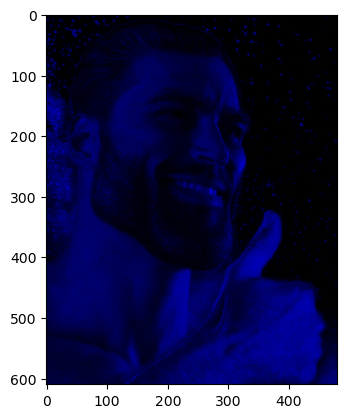

In [325]:
showChannel(image=img, colorChannel=0)
showChannel(image=img, colorChannel=1)
showChannel(image=img, colorChannel=2)

## 7| Converting `IMG` to gray-level using the average method


In [326]:
def grayLevelAverageMethod(image):
    m = getHeight(image=image)
    n = getWidth(image=image)
    o = getColorChannels(image=image)
    grayImage = list()
    for i in range(0, m):
        grayImage.append([])
        for j in range(0, n):
            colorSum = 0
            for k in range(0, o):
                colorSum += image[i][j][k]
            grayImage[i].append(colorSum / 3)

    return grayImage

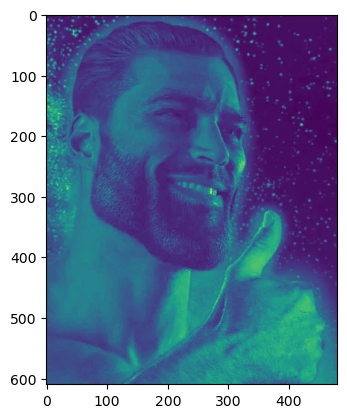

In [327]:
plt.imshow(grayLevelAverageMethod(image=img))
plt.show()

## 8| Converting `IMG` to gray-level using the weighted formula


In [328]:
# (using loops, then without loop and finally using python instruction)
# let us denote the intensity IMG by IMG2
def grayLevelWeightedFormula(image):
    m = getHeight(image=image)
    n = getWidth(image=image)
    grayImage = list()
    for i in range(0, m):
        grayImage.append([])
        for j in range(0, n):
            colorSum = 0
            colorSum = (
                0.29 * image[i][j][0] + 0.59 * image[i][j][1] + 0.11 * image[i][j][2]
            )
            grayImage[i].append(colorSum / 3)

    return grayImage

In [329]:
img2 = grayLevelWeightedFormula(image=img)

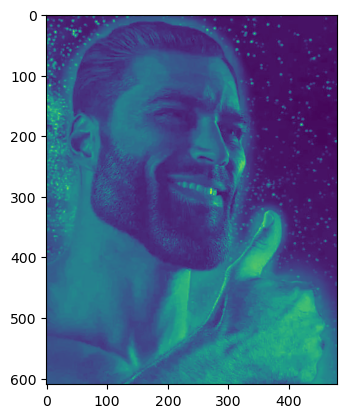

In [330]:
plt.imshow(img2)
plt.show()

## 9| Determine the min / max value of `IMG` and `IMG2`


In [331]:
def getMinDividedMax(image, colorChannel):
    m = getHeight(image=image)
    n = getWidth(image=image)
    max = image[0][0][0]
    min = image[0][0][0]
    for i in range(0, m):
        for j in range(0, n):
            if max < image[i][j][colorChannel]:
                max = image[i][j][colorChannel]
            if min > image[i][j][colorChannel]:
                min = image[i][j][colorChannel]

    return max / min

## 10| Calculating the pixel resolution of `IMG` and `IMG2`


In [332]:
# in terms of MegaPixel


## 11| A function to calculate the size of `IMG`


## 12| Extracting a sub-image from `IMG`


In [333]:
# Extract SUB_IMG the sub-image from IMG by cropping IMG from line 50 to 70, and
# from column 20 to 90. Display the two images

## 13| Quantizing `IMG2` to `128, 64, 32` levels and displaying it


## 14| Converting `IMG` from RGB to the different color spaces HSV, CMYK and YCbCr


## 15| Binarizing `IMG2` according to `10, 50, 125, 25` as threshold


## 16| Calculating the complementary image of `IMG2` and its binarized version


## 17| Adding (and subtracting) the following values `10, 30,60, 200` from `IMG2`


## 18| Increasing / decreasing image brightness by multiplying `IMG2` by `1.7` and `0.6`, respectively


## 19| Devising the image by `2` and `0.5`, respectively


## 20| Loading `IMG3`


In [334]:
# Load another image from your choice (IMG3)


## 21| Calculating the min / max of `(IMG2, IMG3)`


## 22| Combining `IMG2` and `IMG3` linearly using `(0.1, 0.9), (0.5, 0.5),(0.9, 0.1)`


## 23| Creating two images containing squares


In [335]:
# (the intersection of squares is not zero)


## 24| Performing the following logical operations: AND, OR, XOR, XNOR on the two image square


## 25| Generating two other binary images containing arbitrary shapes


## 26| Performing the following operations: erosion, dilation, opening and closing on the image using a 3\*3 square binary image as a structural element


## 27| Generating the gray-level histogram of `IMG2`


## 28| Adding 70 to all the image pixels, and comparing the histogram before and after


## 29| Loading a low contrast image `IMG4`


In [336]:
#  Load a low contrast image from your choice (IMG4)


## 30| Applying the histogram stretching (the two formulas of course), and showing the histogram before and after each process


## 31| Applying Gamma correction on `IMG2`, where the values of Gamma are: `1.5, 4.2, 2.1`


## 32| Applying the algorithm of histogram equalization on `IMG4`, and showing the histogram before and after


In [337]:
# Apply the algorithm of histogram equalization on IMG4, and show the histogram
# before and after this is done (choose the suitable Lmax based on the first histogram).

## 33| Loading `IMG5`


In [338]:
# Load an image from your choice (IMG5)


## 34| Adding a salt, pepper, salt-pepper, Gaussian noise to `IMG5`


## 35| Applying mean and Gaussian filters on the noisy versions of `IMG5`


In [339]:
# (vary the parameters)


## 36| Applying the median filter with a neighborhood of `3,5` and `7`, respectively.


## 37| Applying Sobel operator on `IMG5`, and showing the horizontal, vertical and the final edge


## 38| Showing the gradient magnitude image of `IMG5`, and threshold it using `10, 50, 120, 190` and showing the resulting images


## 39| Showing the edge image in which the pixels kept only with the maximum of gradient in the gradient direction


## 40| Detecting the edges in `IMG5` using Laplacian of Gaussian


## 41| Detect the edges in IMG5 using canny algorithm
